In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import accuracy_score

### 데이터불러오기

In [291]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [293]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [294]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## 결측치 처리 (중앙값으로)

In [295]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)


In [296]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 데이터 분리 (test, train)

In [298]:
X =  df.drop("Potability",axis=1).values
y=   df['Potability'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [299]:
print("X_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


X_train shape: (2293, 9)
x_test shape: (983, 9)
y_train shape: (2293,)
y_test shape: (983,)


### DecisionTree 로 검증

In [302]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.5961


### scaler 사용해보기

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [311]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [312]:
max_depth = range(1,11)  # 1 ~ 10 (max_depth 후보들)

# max_depth별 train/test set의 평가 결과를 저장할 리스트
train_acc_list = []
test_acc_list = []

for depth in max_depth:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [313]:
print(train_acc_list)
print('---------------')
print(test_acc_list)

[0.6201482773658962, 0.6406454426515482, 0.6506759703445268, 0.6633231574356738, 0.68512865242041, 0.7112952464020933, 0.7278674225904928, 0.7492368076755342, 0.7714784125599651, 0.793720017444396]
---------------
[0.6093591047812817, 0.6215666327568667, 0.6256358087487284, 0.6286876907426246, 0.6500508646998983, 0.6490335707019329, 0.6632756866734486, 0.6408952187182095, 0.6459816887080366, 0.6337741607324516]


In [314]:
import pandas as pd
result_df = pd.DataFrame({'Train Acc':train_acc_list, 
                          'Test Acc':test_acc_list}, 
                         index=max_depth
                        )
result_df
result_df.rename_axis('Max Depth', inplace=True) #rename_axis: index/컬럼명의 name을 지정
result_df

,Train Acc,Test Acc
Max Depth,,
1,0.620148,0.609359
2,0.640645,0.621567
3,0.650676,0.625636
4,0.663323,0.628688
5,0.685129,0.650051
6,0.711295,0.649034
7,0.727867,0.663276
8,0.749237,0.640895
9,0.771478,0.645982


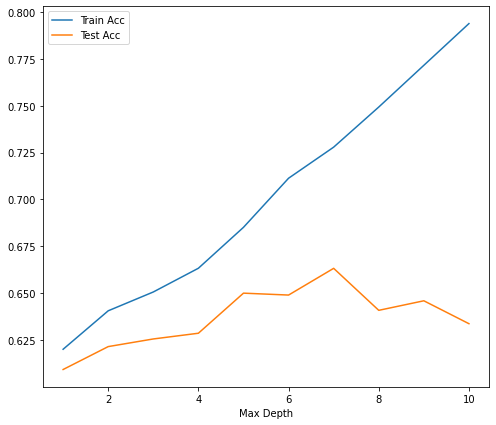

In [315]:
import matplotlib.pyplot as plt
result_df.plot(figsize=(8,7))
plt.show()

In [316]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [317]:
rf = RandomForestClassifier(n_estimators=1000, #DecisionTree 모델의 개수
                            max_depth=5,      #DecisionTree들의 하이퍼파라미터인 max_depth를 5로 설정
                            random_state=0,   
                            n_jobs=-1)

rf.fit(X_train, y_train) #학습 - 500개의 DecisionTree 모델들을 학습(X_train, y_train을 이용해서)

RandomForestClassifier(max_depth=5, n_estimators=1000, n_jobs=-1,
                       random_state=0)

In [318]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

proba_train = rf.predict_proba(X_train)
proba_test = rf.predict_proba(X_test)

In [319]:
print(accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test))

print(roc_auc_score(y_train, proba_train[:,1]), roc_auc_score(y_test, proba_test[:, 1]))

0.6886175316179677 0.6449643947100712
0.8246545489379025 0.6566073143056648


In [320]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score



params = {
    "n_estimators":range(100,1001, 100), # 100 ~ 1000 100
    "max_depth":range(1,11),
    "max_features":range(4,31,2)
}
rs = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                       params,
                       scoring='accuracy',
                       cv=4,
                       n_jobs=-1,
                       n_iter=60)

In [321]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 11),
                                        'max_features': range(4, 31, 2),
                                        'n_estimators': range(100, 1001, 100)},
                   scoring='accuracy')

In [322]:
rs.best_score_

0.6681237876327903

In [323]:
rs.best_params_

{'n_estimators': 800, 'max_features': 6, 'max_depth': 10}

In [232]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [233]:
water = df
X =  df.drop("Potability",axis=1).values
y=   df['Potability'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [234]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [235]:
def print_metrics(y, y_pred, title=None):
    if title:
        print(title)
    print(f'정확도: {accuracy_score(y, y_pred)}, \
            재현율(recall): {recall_score(y, y_pred)}, \
            정밀도(precision): {precision_score(y, y_pred)}, \
            F1점수: {f1_score(y, y_pred)}')

In [236]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [237]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

In [238]:
print_metrics(y_train, pred_train)

정확도: 0.6109076109076109,             재현율(recall): 0.0020876826722338203,             정밀도(precision): 1.0,             F1점수: 0.004166666666666667


In [239]:
print_metrics(y_test, pred_test)

정확도: 0.6092796092796092,             재현율(recall): 0.0,             정밀도(precision): 0.0,             F1점수: 0.0


/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
param = {
    'C':[0.01, 0.1,0.3,0.5,0.7]
}
gs = GridSearchCV(LogisticRegression(random_state=0), 
                  param,
                  cv=5, 
                  scoring='accuracy', 
                  n_jobs=-1)

In [241]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.3, 0.5, 0.7]}, scoring='accuracy')

In [242]:
gs.best_params_

{'C': 0.1}

In [243]:
best_model = gs.best_estimator_
pred_test = best_model.predict(X_test_scaled)
accuracy_score(y_test, pred_test)

0.6092796092796092